First, we'll download and format our data.
We are using a modified version of data sourced from this link: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

Download the dataset we'll be using here: https://drive.google.com/file/d/1F-7T3erdExrqd0W-tiZMDT-0GPUdQ8kZ/view?usp=sharing

# If you run into a cetificate error with NLTK when running code locally, please try this workaround to download packages locally using the NLTK downloader (run this code in your local terminal, not in Colab):


In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon')

In [ ]:
# Processing Our Data

# First, import Pandas and JSON
import pandas as pd
import json

# Open the file, load it using the json package, then create a dataframe in Pandas using the json_normalize function.
file = open('sample_data/Software_array_small.json')
data = json.load(file)

df = pd.json_normalize(data)
print(df)

In [ ]:
# Let's simplify our data by trimming the components of the dataframe we won't be using.
cleaned_df = df[['overall','summary', 'reviewText']]
print(cleaned_df)

In [ ]:
# Starting Out with Sentiment Analysis

# import the Vader package from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the lexicon used by Vader
import nltk
nltk.download('vader_lexicon')

# pandas configuration
pd.options.mode.chained_assignment = None

# Loading our sentiment analyzer
sent_an = SentimentIntensityAnalyzer()

# A function that returns our Vader sentiment scores
def vader_sentiment(text):
    return sent_an.polarity_scores(text)['compound']

# Create new column for the Vader compound sentiment score
cleaned_df['sentiment score'] = cleaned_df['reviewText'].apply(vader_sentiment)

# Categorize our sentiment values as positive, negative,or neutral based on specified score thresholds
def categorize_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# Create a new column in our dataframe based on our categorized sentiment scores
cleaned_df['sentiment classification'] = cleaned_df['sentiment score'].apply(categorize_sentiment)

print(cleaned_df)

Now, let's get the mean of our sentiment scores.

In [ ]:
sentiment_mean = cleaned_df['sentiment score'].mean()
print(sentiment_mean)

And the counts for how many positive or negative reviews we found.

In [ ]:
cleaned_df.groupby(['sentiment classification']).size().reset_index(name='count')

Now that we've performed sentiment analysis on our dataset, let's try a hands-on exercise to practice using Vader on a simple array of sentences. Try completing the code below to perform sentiment analysis on the list of five sentences.

# To see example solutions, following this link: https://colab.research.google.com/drive/1C4X8bxkp4OX62Vj1mLC0t9IFZBfnKBnc?usp=sharing

In [ ]:
# importing the necessary packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Loading our sentiment analyzer
sent_an = SentimentIntensityAnalyzer()

example_sentences = ["As I said above, if you're a novice, a relative newcomer or just an experienced web designer who wants a refresher course, this is a good way to do it.",
                     "Kinda dumb UI choice, initially confusing.",
                     "If you would like to dive into the publishing aspects and really optimizing your workflow, then this would be a good investment for you.",
                     "The exposition is clear, but perhaps a bit dry.",
                     "The software is well known and excellent."]

# your code here...

In [ ]:
# TextBlob

# First, install the package.
!pip install textblob

TextBlob's sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0], with -1 being a negative sentiment and 1 being positive. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

First, let's try out the package on a simple sample sentence.

In [ ]:
# importing the package
from textblob import TextBlob

testimonial1 = TextBlob("Textblob is amazingly simple to use. What great fun!")

testimonial2 = TextBlob("Textblob is horrendous. What a terrible package!")

print(testimonial1.sentiment)

print(testimonial1.sentiment.polarity)


print(testimonial2.sentiment)

print(testimonial2.sentiment.polarity)

Next, we can use the sentiment_assessments feature to get additional details about the text after applying sentiment analysis to it.  The sentiment_assessments feature allows us to return the subjectivity score of the sentence and individual assessments of each word in the sentence, where subjectivity is a float within the range [0.0, 1.0] (with 0.0 being very objective and 1.0 being very subjective) and assessments is a list of polarity and subjectivity scores for the assessed tokens.

In [ ]:
from textblob import TextBlob

testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

print(testimonial.sentiment_assessments.subjectivity)
print(testimonial.sentiment_assessments.assessments)

Finally, let's try applying TextBlob to the text in our dataframe. This is our first hands-on exercise--try to complete the code below to use Text Blob for sentiment analysis on our reviewText column, like we did with Vader earlier.

In [ ]:
# A function that returns our Text Blob sentiment scores
def textblob_sentiment(text):
    tb_sentiment = TextBlob(text)
    return tb_sentiment.sentiment.polarity

# Create a new column for the Text Blob compound sentiment score
cleaned_df['text blob sentiment score'] = cleaned_df['reviewText'].apply(textblob_sentiment)

# Categorize our sentiment values as positive, negative,or neutral based on specified score thresholds
def categorize_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# Create a new column in our dataframe based on our categorized sentiment scores
cleaned_df['text blob sentiment classification'] = cleaned_df['text blob sentiment score'].apply(categorize_sentiment)

print(cleaned_df)

In [ ]:
# Finally, let's see what it looks like to train our own sentiment classifier.
# This can be especially useful when working with highly specific data or non-English languages.

# imports
import nltk
from nltk import word_tokenize
nltk.download('punkt')

tb_grouped_df = cleaned_df.groupby('text blob sentiment classification')
tb_pos_group = tb_grouped_df.get_group('positive')

# First, we provide our training data as a list of sentences and their sentiment classifications:
training_data = [("It's practical to hope because the hope is for us to survive as a human species.", "pos"),
          ("Italy's soccer players were unlucky to find themselves in a qualifying group with Spain", "neg"),
          ("Instead, root for the Knights whose fans are childlike in their glee.", "pos"),
          ("The overwhelming perception is that the European Union has done very little to alleviate this specifically Italian difficulty.", "neg"),
          ("We are in for a period of painful social conflict, at the end of which perhaps we may remember why it once seemed wise to relegate certain emotions to the stadium.", "neg"),
          ("The heartlessness of that is mind-boggling.", "neg"),
          ("My father was an insatiable learner with intelligence that his baby brother once told me bordered on genius.", "pos"),
        ]

# Training NLTK's Naïve Bayes Classifier with a dictionary created from our list
dictionary = set(word.lower() for passage in training_data for word in word_tokenize(passage[0]))

t = [({word: (word in word_tokenize(x[0])) for word in dictionary}, x[1]) for x in training_data]

classifier = nltk.NaiveBayesClassifier.train(t)

# Let's test out our new classifier on a small sample of our positive reviews:
random_pos_sample_2 = tb_pos_group.sample(10)
sample_texts = random_pos_sample_2['reviewText']

# Looping through our list of reviews and outputting the classifier's assessments.
for s in sample_texts:
    test_data = s
    test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}

    print(s[:100])
    print("Classification: " + classifier.classify(test_data_features))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Microsoft MapPoint is good for two types of users:  those who need a 'super' GPS, and those who need
Classification: neg
The Anime Studio packaging makes one think the product is geared toward children or beginners. As a 
Classification: neg
This is a great USB hub, it works perfectly! I love the blue illumination, so you can see that it's 
Classification: neg
I used to be a longtime Quickbooks Pro user, but switched over to&nbsp;<a data-hook="product-link-li
Classification: neg
I have used Quicken since the Windows 95 days and upgraded on a regular basis.  For the most part I 
Classification: neg
I have been trying out a number of Corel products over the past year and cannot help but notice the 
Classification: neg
I used Quicken for at least 10 years, going back to around 1990.  I stopped using Quicken about 8 or
Classification: neg
I love my Macs.  In truth, I love nearly everything created by Apple including their software.  I ow
Classification: neg
This is really a very good upgra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x1200 with 0 Axes>

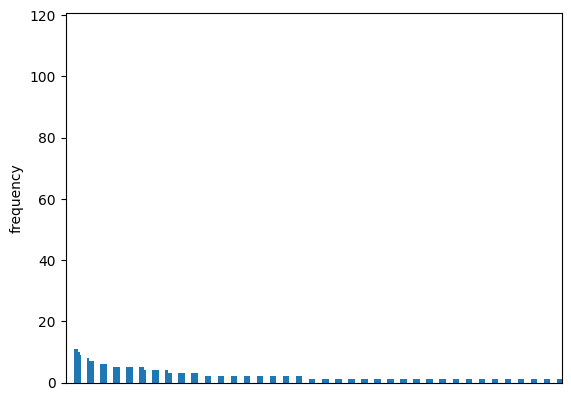

In [ ]:
# Now, let's visualize our data

# Import the matplotlib library
import matplotlib.pyplot as plt

# Specify the details of our desired plot
plt.figure(figsize=(12,12))
# creating the figure and single axis
fig,ax = plt.subplots()
# setting the limit for the y-axis
plt.ylim(0, 20)
# creating the graph
graph_image = cleaned_df['sentiment score'].value_counts().plot(kind='bar', ylabel='frequency')
# hiding the x-axis
graph_image.axes.get_xaxis().set_visible(False)

# save the file
from google.colab import files
plt.savefig("example.png")
files.download("example.png")

# displaying the figure
plt.show()

In [ ]:
# Let's try another visualization where we look at a smaller subset of our data
# We'll get a random sample of 50 entries in our dataframe and plot those

# Taking our sample
random_sample = cleaned_df.sample(50)
print(random_sample)

# Specifying our plot details again
plt.figure(figsize=(8,8))
fig,ax = plt.subplots()
random_sample['sentiment classification'].value_counts().plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

For our third hands-on exercise, try to create your own plot using the sentiment scores we generated using Text Blob.

In [ ]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# your code here...

In [ ]:
# Now let's visualize the text itself
# We'll stick with a small, random sample of our data to keep things simple

# First, we create a new dataframe by grouping our data based on its sentiment classification.
# For this example, we'll only look at reviews classified as positive
grouped_df = cleaned_df.groupby('sentiment classification')
pos_group = grouped_df.get_group('positive')
random_pos_sample = pos_group.sample(50)
print(random_pos_sample)

4735    I bought this from Quicken directly, downloade...
3937    Despite what their website says, the importing...
3048    As someone who has used Peachtree for my small...
3168    I had been running XP for some time, but I end...
3177    This looks like it would be a good product, wi...
1006    I am amazed at the negative reviews.\n\nThis s...
3594    I'll start off by stating the installation of ...
4785    Trend Micro Titanium Maximum Security is an ex...
3219    Navigon has left the GPS hardware business, an...
3021    You can tell right away that Microsoft Office ...
2602                                                great
4326    This is the second year I have used Trend Micr...
1844    This isn't just a 5-port metal sheathed battle...
68      My husband & I used this software in late 2010...
2811    I have been using Tutbotax for years.  Now I h...
950     I prefer MS Office 2003 to any of its earlier ...
365     Having tried a number of different wireless ne...
2466    Garmin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4735           bought
4735          quicken
4735         directly
4735                ,
4735       downloaded
            ...      
4008    professionals
4008       apprecaite
4008          program
4008          greatly
4008                .
Name: wcText, Length: 9057, dtype: object
wcText
.             713
,             564
)              60
(              60
program        60
             ... 
brief           1
selection       1
pre-judge       1
enjoyed         1
apprecaite      1
Name: count, Length: 2593, dtype: int64


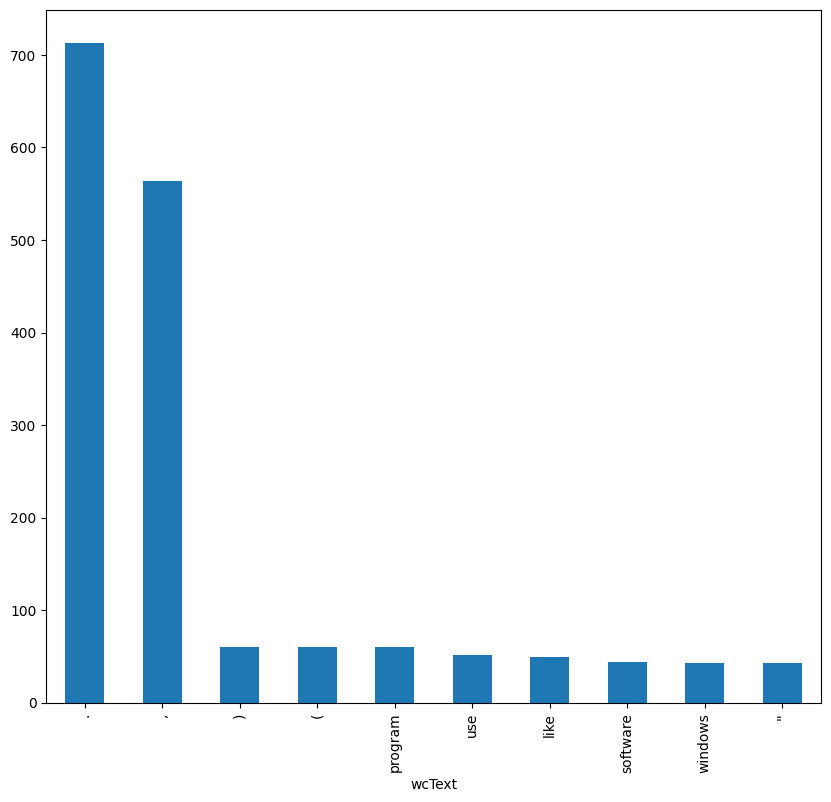

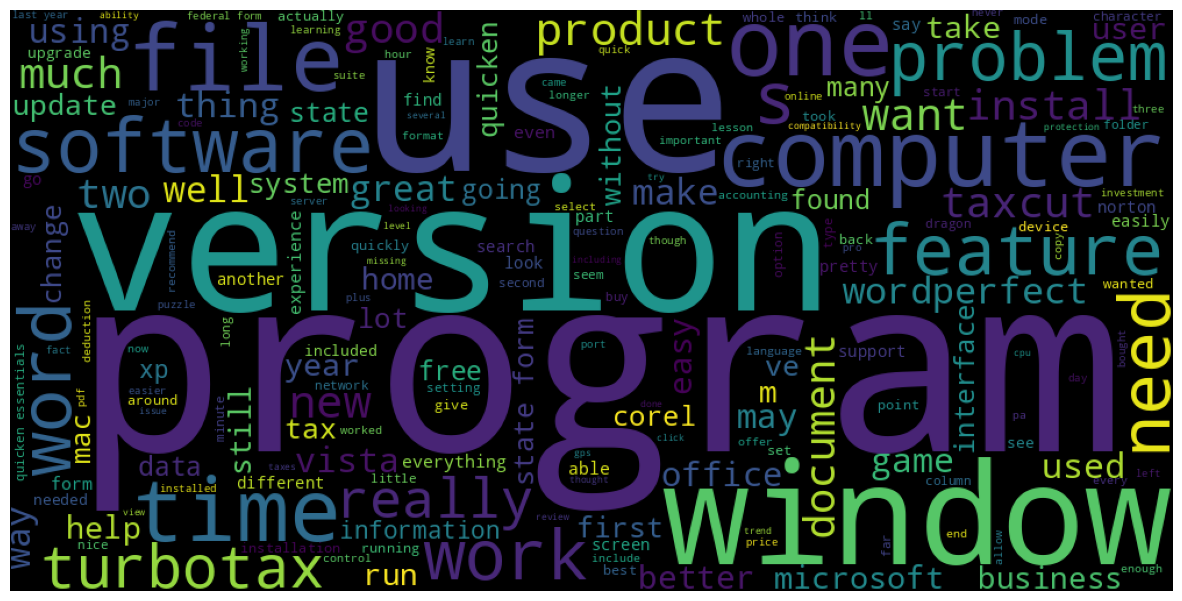

In [ ]:
# Now we'll create a wordcloud based on word frequencies in our positive reviews.
# First, we get the data ready for visualization...

# We remove punctuation from the dataframe using a regular expression
random_pos_sample['wcText'] = random_pos_sample['reviewText'].str.replace('[^\w\s]','')

print(random_pos_sample['wcText'])

# Next we remove the stopwords (these can be modified to include non-english languages)
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# You can add custom stopwords, as well:
# stopwords.append('example')

# Make all of the words in our 'Tokenized Text' column lowercase
random_pos_sample['wcText'] = random_pos_sample['wcText'].str.lower()

# A lambda function is a small, anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# Here, we're joining the words not in the stopwords list into a single string.
# This prepares the text for tokenization.
random_pos_sample['wcText'] = random_pos_sample['wcText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


# Next, tokenize the text into words using NLTK
from nltk import word_tokenize
nltk.download('punkt')

random_pos_sample['wcText'] = random_pos_sample['wcText'].apply(word_tokenize)


# Now we can count the word frequencies in our "Tokenized Text" column
exploded_text = random_pos_sample['wcText'].explode() # Transform each element of a list-like to a row, replicating index values.
print(exploded_text)

word_counts = exploded_text.value_counts()
print(word_counts)


# Bar graph
import matplotlib.pyplot as plt

word_counts.head(10).plot(x="Words", y="Count", kind="bar", figsize=(10, 9))
plt.show()


# Word cloud
from wordcloud import WordCloud

# Convert our exploded_text list to a string
wordcloud_string=(" ").join(exploded_text)

# Generate the word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(wordcloud_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight') # removes extra whitespace around our figure
plt.show()
plt.close()